<a href="https://colab.research.google.com/github/Abhilash11Addanki/DeepLearning/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [4]:
#Printing the shapes of train and test data
print(train_images.shape,train_labels.shape)
print(test_images.shape,test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


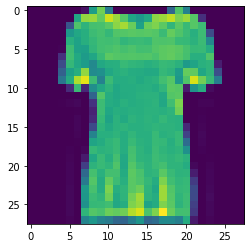

In [5]:
plt.imshow(train_images[10])

In [6]:
#Normalizing the train and test data
train_images = train_images/255
test_images = test_images/255

In [7]:
#Defining the layers
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(units = 512,activation = tf.nn.relu),
                                    tf.keras.layers.Dense(units = 10,activation = tf.nn.softmax)])

In [8]:
model.compile(optimizer = tf.optimizers.Adam(),loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [9]:
#Defining a callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs = {}):
    if(logs.get('accuracy')>=0.90):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

In [10]:
model.fit(train_images,train_labels,epochs = 50,callbacks = [myCallback()])

Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5917 - accuracy: 0.7946
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3618 - accuracy: 0.8675
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3201 - accuracy: 0.8817
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3058 - accuracy: 0.8877
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2790 - accuracy: 0.8965
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2633 - accuracy: 0.9045

Reached 90% accuracy so cancelling training!


In [11]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3404 - accuracy: 0.8784


[0.3404240608215332, 0.8784000277519226]

**Using Convolution Layers**

In [29]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [30]:
train_images = train_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)

In [31]:
train_images = train_images/255
test_images = test_images/255

In [32]:
conv_model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128, activation='relu'),
                                  tf.keras.layers.Dense(10,activation='softmax')])

In [33]:
conv_model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [34]:
conv_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [35]:
conv_model.fit(train_images,train_labels,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 93s 50ms/step - loss: 0.6253 - accuracy: 0.7705
Epoch 2/5
1875/1875 [==============================] - 89s 48ms/step - loss: 0.3093 - accuracy: 0.8870
Epoch 3/5
1875/1875 [==============================] - 92s 49ms/step - loss: 0.2507 - accuracy: 0.9067
Epoch 4/5
1875/1875 [==============================] - 116s 62ms/step - loss: 0.2172 - accuracy: 0.9192
Epoch 5/5
1875/1875 [==============================] - 95s 50ms/step - loss: 0.1880 - accuracy: 0.9298


In [36]:
conv_model.evaluate(test_images,test_labels)

313/313 [==============================] - 5s 15ms/step - loss: 0.2574 - accuracy: 0.9076


[0.2573975920677185, 0.9075999855995178]

**Experimentation**

Keeping the convolutions as 16

In [41]:
conv_model_1 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128, activation='relu'),
                                  tf.keras.layers.Dense(10,activation='softmax')])

In [42]:
conv_model_1.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [43]:
conv_model_1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               51328     
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

In [44]:
conv_model_1.fit(train_images,train_labels,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.7180 - accuracy: 0.7380
Epoch 2/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.3646 - accuracy: 0.8667
Epoch 3/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.3155 - accuracy: 0.8845
Epoch 4/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2797 - accuracy: 0.8967
Epoch 5/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2582 - accuracy: 0.9042


In [45]:
conv_model_1.evaluate(test_images,test_labels)

313/313 [==============================] - 3s 8ms/step - loss: 0.2879 - accuracy: 0.8966


[0.28791922330856323, 0.8966000080108643]

Keeping only the first convolution layer

In [46]:
conv_model_2 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128, activation='relu'),
                                  tf.keras.layers.Dense(10,activation='softmax')])

In [47]:
conv_model_2.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [48]:
conv_model_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               1384576   
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________


In [49]:
conv_model_2.fit(train_images,train_labels,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 61s 32ms/step - loss: 0.5212 - accuracy: 0.8168
Epoch 2/5
1875/1875 [==============================] - 61s 33ms/step - loss: 0.2650 - accuracy: 0.9062
Epoch 3/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.2166 - accuracy: 0.9201
Epoch 4/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1871 - accuracy: 0.9304
Epoch 5/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1480 - accuracy: 0.9448


In [50]:
conv_model_2.evaluate(test_images,test_labels)

313/313 [==============================] - 3s 8ms/step - loss: 0.2585 - accuracy: 0.9129


[0.2585330605506897, 0.9128999710083008]

Adding more convolution layers

In [58]:
conv_model_3 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128, activation='relu'),
                                  tf.keras.layers.Dense(10,activation='softmax')])

In [59]:
conv_model_3.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [60]:
conv_model_3.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 32)              

In [61]:
conv_model_3.fit(train_images,train_labels,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.8639 - accuracy: 0.6814
Epoch 2/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.4745 - accuracy: 0.8271
Epoch 3/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.4042 - accuracy: 0.8505
Epoch 4/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3679 - accuracy: 0.8658
Epoch 5/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.3427 - accuracy: 0.8731
